# **Frequency analysis in Python and MNE**

### **Importing one channel EEG in text format**

In [1]:
# Importing necessary libraries
import numpy as np
import matplotlib.pyplot as plt

# Loading EEG data from a text file
data = np.loadtxt('One_Ch_EEG.txt')
data

array([ 32.267,  29.942,  10.431, ..., -30.576, -18.673,  -4.649])

In [2]:
#Our one channel shape
print(data.shape)

(5120,)


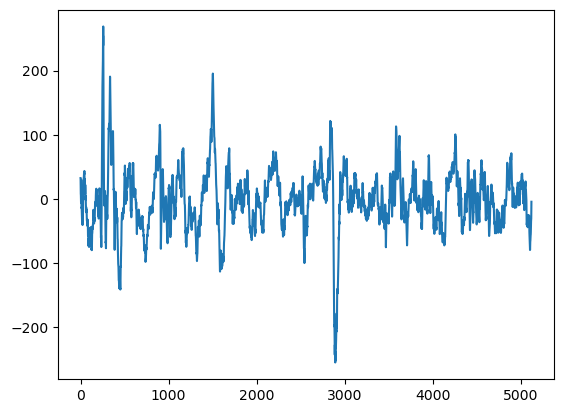

In [3]:
#Plotting one channel data
plt.plot(data)

### **Changing to second instead of points**

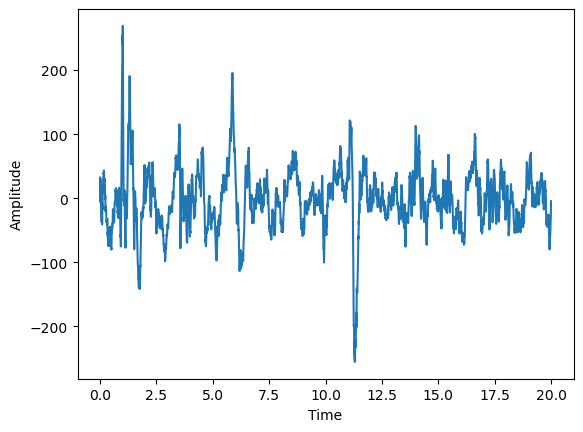

In [4]:
# Defining the sampling rate
srate = 256

# Creating a time vector based on the length of the data and the sampling rate
time = np.arange(len(data)) / srate

plt.plot(time, data)
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.show()

### **Using FFT function for EEG data**

In [5]:
# Calculating the power spectrum using Fast Fourier Transform (FFT)
powerSpectrum = np.fft.fft(data)

# Generating frequency values corresponding to the FFT result
freqs=np.fft.fftfreq(data.size, d=1/256)

(1.0, 40.0)

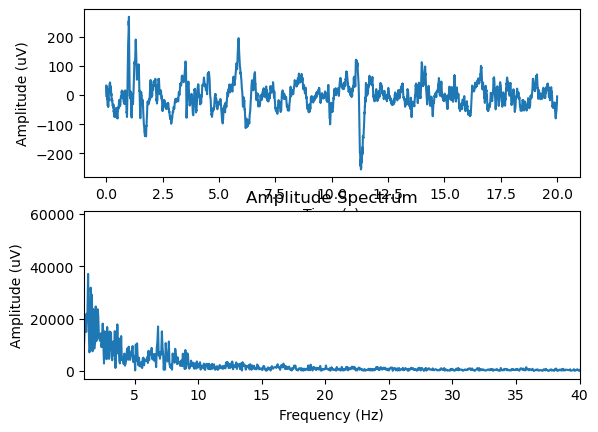

In [6]:
#Plot the result
fig, ax = plt.subplots(2,1)
ax[0].plot(time, data)
ax[0].set_xlabel('Time (s)')
ax[0].set_ylabel('Amplitude (uV)')

# Creating a mask to retain only positive frequencies
mask = freqs > 0
freqsPositive = freqs[mask]
spectrumPositive = np.abs(powerSpectrum)[mask]

ax[1].plot(freqsPositive, spectrumPositive)
ax[1].set_xlabel('Frequency (Hz)')
ax[1].set_ylabel('Amplitude (uV)')
ax[1].set_title('Amplitude Spectrum')
ax[1].set_xlim([1,40])


### **Frequency analysis in MNE**

In [7]:
#Importing necessary libraries
import mne
from mne.preprocessing import ICA
import matplotlib.pyplot as plt
%matplotlib qt

#Importing the raw EEG data (EDF format) and importing into memory
EEG = mne.io.read_raw_fif('EEGFiltered.fif', preload=True)

#Filtering the data
EEG.filter(0.1,30)

#Create montage
montage = mne.channels.make_standard_montage('standard_1020')
#Set montage to raw EEG data
EEG.set_montage(montage)


Opening raw data file EEGFiltered.fif...
Isotrak not found
    Range : 0 ... 197375 =      0.000 ...   770.996 secs
Ready.


C:\Users\SUBHAM\AppData\Local\Temp\ipykernel_14056\1362838957.py:8: RuntimeWarning: This filename (EEGFiltered.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  EEG = mne.io.read_raw_fif('EEGFiltered.fif', preload=True)


Reading 0 ... 197375  =      0.000 ...   770.996 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.1 - 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.10
- Lower transition bandwidth: 0.10 Hz (-6 dB cutoff frequency: 0.05 Hz)
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 8449 samples (33.004 s)



[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  19 out of  19 | elapsed:    0.0s finished


Measurement date,"April 08, 2023 19:44:04 GMT"
Experimenter,Unknown
Participant,X
Digitized points,22 points
Good channels,19 EEG
Bad channels,None
EOG channels,Not available
ECG channels,Not available
Sampling frequency,256.00 Hz
Highpass,3.00 Hz
Lowpass,30.00 Hz


### **Generate the Power Spectral Density (PSD)**

In [8]:
psd, freqs =mne.time_frequency.psd_array_multitaper (EEG.get_data(), EEG.info['sfreq'],
                                                     fmin=0.5, fmax=30)
psd.shape

    Using multitaper spectrum estimation with 1 DPSS windows


C:\Users\SUBHAM\AppData\Local\Temp\ipykernel_14056\1369213395.py:1: RuntimeWarning: Could not properly use low_bias, keeping lowest-bias taper
  psd, freqs =mne.time_frequency.psd_array_multitaper (EEG.get_data(), EEG.info['sfreq'],


(19, 22745)

### **PSDs for 19 channels**

In [9]:
# Creating a subplot to visualize power spectral density (PSD) for all EEG channels
fig, ax = plt.subplots(figsize=(20,10))
for i in range(len(EEG.ch_names)):
    ax.plot(freqs, psd[i], label=EEG.ch_names[i])
    ax.set_xlabel('Frequency Hz')
    ax.set_ylabel('PSDs for all 19 channels')
plt.legend()
plt.show()


In [10]:
EEG.ch_names

['Fp1',
 'Fp2',
 'F7',
 'F3',
 'Fz',
 'F4',
 'F8',
 'T7',
 'C3',
 'Cz',
 'C4',
 'T8',
 'P7',
 'P3',
 'Pz',
 'P4',
 'P8',
 'O1',
 'O2']

### **PSD for desired channel**

In [11]:
plt.plot(freqs, psd[18], label='O2')
plt.legend()

In [12]:
# Printing the indices and names of all EEG channels
for i in range(len(EEG.ch_names)):
    print(i, EEG.ch_names[i])


0 Fp1
1 Fp2
2 F7
3 F3
4 Fz
5 F4
6 F8
7 T7
8 C3
9 Cz
10 C4
11 T8
12 P7
13 P3
14 Pz
15 P4
16 P8
17 O1
18 O2


In [13]:
plt.plot(freqs, psd[8], label='C3')
plt.plot(freqs, psd[10], label='C4')
plt.legend()
plt.show()


### **Custom topomaps**

In [14]:
im , _ = mne.viz.plot_topomap(psd.mean(axis=-1), pos=EEG.info, cmap='RdBu_r',
                              names=EEG.info['ch_names'])
plt.colorbar(im)

### **Topomaps for Theta, Alpha and Beta ranges**

In [15]:
# Defining the frequency bands of interest
freqBands = [(3, 7), (8, 12), (13, 30)]

# Creating subplots for each frequency band
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
# Looping over each frequency band
for i, (fmin, fmax) in enumerate(freqBands):
    ax = axes[i]
     # Computing power spectral density (PSD) using multitaper method
    psd, freqs = mne.time_frequency.psd_array_multitaper(EEG.get_data(), sfreq=EEG.info['sfreq'], fmin=fmin, fmax=fmax)
    # Plotting topomap for the average PSD across channels
    mne.viz.plot_topomap(psd.mean(axis=-1), pos=EEG.info, cmap='RdBu_r', axes=ax, names=EEG.info['ch_names'])
    # Setting the title for the subplot
    ax.set(title='PSD ({:.1f} - {:.1f}) Hz'.format(fmin, fmax))


    Using multitaper spectrum estimation with 1 DPSS windows


C:\Users\SUBHAM\AppData\Local\Temp\ipykernel_14056\2494553199.py:10: RuntimeWarning: Could not properly use low_bias, keeping lowest-bias taper
  psd, freqs = mne.time_frequency.psd_array_multitaper(EEG.get_data(), sfreq=EEG.info['sfreq'], fmin=fmin, fmax=fmax)


    Using multitaper spectrum estimation with 1 DPSS windows


C:\Users\SUBHAM\AppData\Local\Temp\ipykernel_14056\2494553199.py:10: RuntimeWarning: Could not properly use low_bias, keeping lowest-bias taper
  psd, freqs = mne.time_frequency.psd_array_multitaper(EEG.get_data(), sfreq=EEG.info['sfreq'], fmin=fmin, fmax=fmax)


    Using multitaper spectrum estimation with 1 DPSS windows


C:\Users\SUBHAM\AppData\Local\Temp\ipykernel_14056\2494553199.py:10: RuntimeWarning: Could not properly use low_bias, keeping lowest-bias taper
  psd, freqs = mne.time_frequency.psd_array_multitaper(EEG.get_data(), sfreq=EEG.info['sfreq'], fmin=fmin, fmax=fmax)
